In [2]:
import pandas as pd
from datetime import datetime
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Cleaning import GetCleanedData

In [4]:
PATH = 'src'

header = ['Wikipedia movie ID', 'Freebase movie ID', 'Movie name', 'Movie release date', 'Movie box office revenue', 'Movie runtime', 
          'Movie languages', 'Movie country', 'Movie genres']
df = pd.read_csv(PATH + '/movie.metadata.tsv', sep='\t', names=header, skipinitialspace=True)

df1, df2,df3 = GetCleanedData(df)

In [5]:
df2.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie country,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,[English Language],United States of America,Thriller
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938,3600000.0,106.0,[English Language],United States of America,Musical
13,171005,/m/016ywb,Henry V,1989,10161099.0,137.0,[English Language],United Kingdom,Costume drama
17,77856,/m/0kcn7,Mary Poppins,1964,102272727.0,139.0,[English Language],United States of America,Children's/Family
21,612710,/m/02wjqm,New Rose Hotel,1999,21521.0,92.0,[English Language],United States of America,Thriller


In [25]:
countries_revenues = df2.groupby('Movie country')['Movie box office revenue'].agg(['sum', 'mean', 'max'])
print(countries_revenues)


                                   sum          mean           max
Movie country                                                     
Afghanistan               1.015430e+05  1.015430e+05  1.015430e+05
Argentina                 1.338733e+08  1.912476e+07  4.824559e+07
Australia                 5.680790e+08  9.966299e+06  1.504065e+08
Austria                   9.841844e+07  1.968369e+07  9.218091e+07
Belgium                   1.408431e+08  2.012044e+07  6.560581e+07
Brazil                    1.356305e+07  2.712610e+06  7.856048e+06
Bulgaria                  3.252650e+05  3.252650e+05  3.252650e+05
Canada                    3.749766e+08  5.596666e+06  1.277307e+08
China                     4.252208e+08  4.724676e+07  2.484000e+08
Czech Republic            1.505798e+07  3.011596e+06  7.730711e+06
Denmark                   1.541143e+08  1.401039e+07  6.712680e+07
England                   2.915123e+07  2.915123e+06  1.185021e+07
Finland                   6.480508e+07  7.200564e+06  2.555581

In [18]:
print(countries_revenues)

<bound method NDFrame.head of Movie country                  
Afghanistan               51762       101543.0
Argentina                 53940     48245593.0
                          68033     25793614.0
                          27850     18052128.0
                          4410      17159458.0
                                      ...     
United States of America  13479    921111197.0
Venezuela                 1866       3579383.0
Weimar Republic           6737         77982.0
West Germany              62222     84970337.0
                          18126     25948300.0
Name: Movie box office revenue, Length: 450, dtype: float64>

In [6]:
df_pivoted = df2.pivot(index=None, columns='Movie country', values='Movie box office revenue')

# Display the result
print(df_pivoted)

KeyError: None

In [22]:
countries = df1.groupby(['Movie country']).count()['Wikipedia movie ID']

countries['Russia'] = countries['Russia'] + countries['Soviet Union']
countries['Germany'] = countries['Germany'] + countries['German Democratic Republic'] + countries['West Germany']
countries = countries.drop('Soviet Union')
countries = countries.nlargest(18)
countries_names = countries.index.to_list()

In [17]:
df3_boxplot = df3[['Movie country','Movie box office revenue']]
df3_boxplot.head()

,Movie country,Movie box office revenue
0,United States of America,14010832.0
7,United States of America,3600000.0
13,United Kingdom,10161099.0
17,United States of America,102272727.0
21,United States of America,21521.0


In [19]:
df_pivoted = df3_boxplot.pivot(columns='Movie country', values='Movie box office revenue')

In [27]:
df_selected = df_pivoted[countries_names]
df_selected.head()

Movie country,United States of America,India,United Kingdom,France,Japan,Italy,Argentina,Canada,Germany,Hong Kong,Mexico,Australia,South Korea,Spain,Russia,Netherlands,Denmark,Sweden
0,14010832.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3600000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,10161099.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,102272727.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,21521.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df_clean = df_selected

# Créer une liste pour chaque pays (chaque colonne sauf 'Movie country')
country_lists = {col: df_selected[col].dropna().tolist() for col in df_selected.columns}
countries_names = list(country_lists.keys())


In [54]:
country_lists
df_boxplotv2 = list(country_lists.values())

([<matplotlib.axis.XTick at 0x15de06678d0>,
 [Text(1, 0, 'United States of America'),
  Text(2, 0, 'India'),
  Text(3, 0, 'United Kingdom'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Japan'),
  Text(6, 0, 'Italy'),
  Text(7, 0, 'Argentina'),
  Text(8, 0, 'Canada'),
  Text(9, 0, 'Germany'),
  Text(10, 0, 'Hong Kong'),
  Text(11, 0, 'Mexico'),
  Text(12, 0, 'Australia'),
  Text(13, 0, 'South Korea'),
  Text(14, 0, 'Spain'),
  Text(15, 0, 'Russia'),
  Text(16, 0, 'Netherlands'),
  Text(17, 0, 'Denmark'),
  Text(18, 0, 'Sweden')])

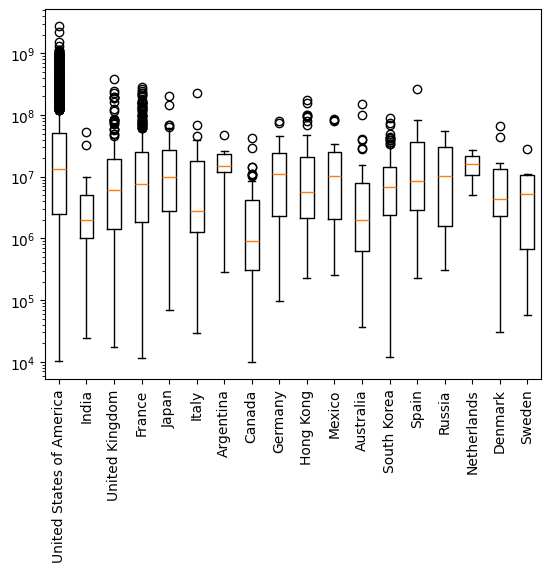

In [56]:
plt.boxplot(df_boxplotv2)
plt.yscale('log')
plt.xticks(np.arange(len(countries_names))+1, countries_names, rotation= 90)